# Açıklayıcı Veri Analizi Nedir?
Açıklayıcı veri analizi (Exploratory data analysis - EDA), istatistik ve olasılık teorisinden basit kavramları kullanarak verileri analiz etme ve sonuçları kolay anlaşılır bir şekilde görsellikle destekleyen bir formatta sunma sürecidir. 

İris çiçeği veri seti (iris.csv), iris çiçeklerinin üç türünün her birini içeren 50 numuneden oluşmaktadır: Iris Setosa, Iris Virginica ve Iris Versicolor. İris çiçeği veri seti, İngiliz istatistikçi ve biyolog Ronald Fisher tarafından 1936 tarihli “Taksonomik problemlerde çoklu ölçümlerin kullanımı” başlıklı makalesinde tanıtıldı.

İris verileri çok değişkenli bir veri kümesidir. Her bir numuneden ölçülen dört özellik, santimetre cinsinden — çanak yaprağı uzunluğu (sepal length), çanak yaprağı genişliği (sepal width), taç yaprağı uzunluğu (petal length) ve taç yaprağı genişliğidir (petal width).



# iris.png
İris çiçeği verileri herkesin kullanımına açıktır. Çoğunlukla Veri Bilimi ve Makine Öğrenmesi alanına yeni başlayanlar tarafından en yaygın kullanılan veri kümelerinden biridir. Bu veri seti, California-Irvine Üniversitesi arşivlerinden indirilebilmektedir.

Makine öğrenmesi terminolojisinde çanak yaprağı uzunluğu, çanak yaprak genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliği gibi gözlemlenen özellikler bağımsız değişkenler, belirlenecek çiçek sınıfı etiketi ise (Setosa, Virginica ve Versicolor) bağımlı değişken olarak adlandırılır.

Bu veri setini kullanmamızdaki amaç; çanak yaprak uzunluğu, çanak yaprak genişliği, taç yaprak uzunluğu ve taç yaprak genişliği göz önüne alındığında, seçilen numunenin iris çiçeğinin üç türünden biri olan Setosa, Virginica ve Versicolor olarak sınıflandırılmasıdır.

# Temel İstatistiksel Analiz - Merkezi Eğilim ve Verilerin Yayılması
Gerekli tüm Python kitaplıklarını içe aktaralım ve grafikler için sabit parametreleri belirleyelim:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.groupby('Species').agg(['mean', 'median'])

Id        SepalLengthCm        SepalWidthCm         \
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4   
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

In [ ]:
Her bir çiçek türünün öznitelikleri için standart sapmayı belirleyelim.

In [7]:
iris.groupby('Species').std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,14.57738,0.516171,0.313798,0.469911,0.197753
Iris-virginica,14.57738,0.635880,0.322497,0.551895,0.274650


# Kutu Grafiği (Box Plot)

Kutu (box) ya da yatay çizgi (whisker) grafiği olarak bilinen bu grafik biçimi, geniş veri setlerinin özetini beş ayrı değer ile gösterir: minimum değer, alt çeyreklik (%25'lik dilim - 25th quartile), medyan (% 50'lik dilim), üst çeyreklik (%75'lik dilim) ve maksimum değer.

Seaborn kitaplığını kullanarak, iris veri setindeki çiçek türlerine ait kutu grafiklerini çizdirelim.

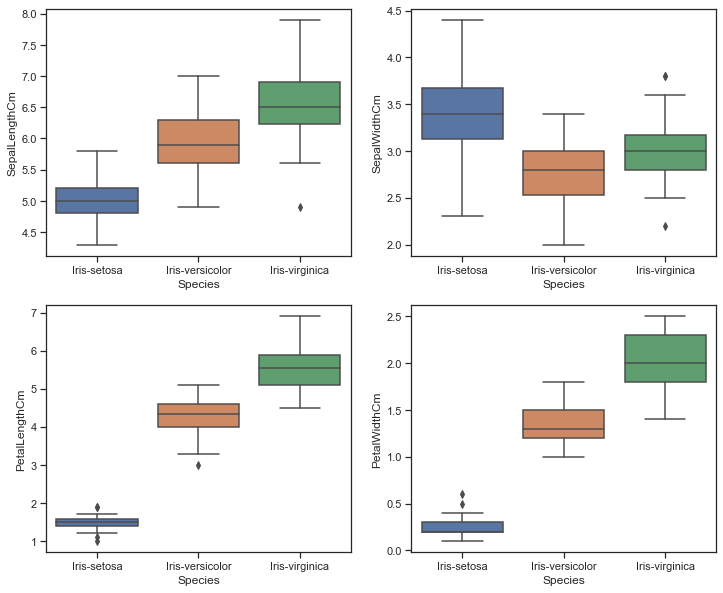

In [13]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

# Keman Grafiği (Violin Plot)

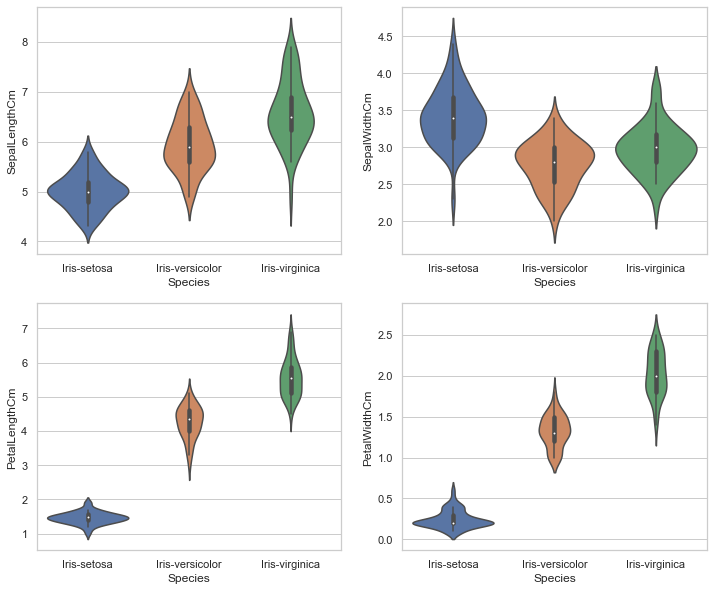

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

In [15]:
iris.shape

(150, 6)

In [16]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Veri kümesinde null / NaN değer olup olmadığını görelim. Herhangi bir null değer varsa, aşağıdaki adımlardan birini izlememiz gerekir:

null değerleri olduğu gibi bırakmak
null değerlerin olduğu sütunun / özniteliğin ortalama değerini, null değerler yerine yerleştirmek
null değerleri, "?" ya da "-9999" değerleri ile değiştirmek

In [18]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
Burada, veri Kümemizde null değer olmadığını açıkça görebilmekteyiz.

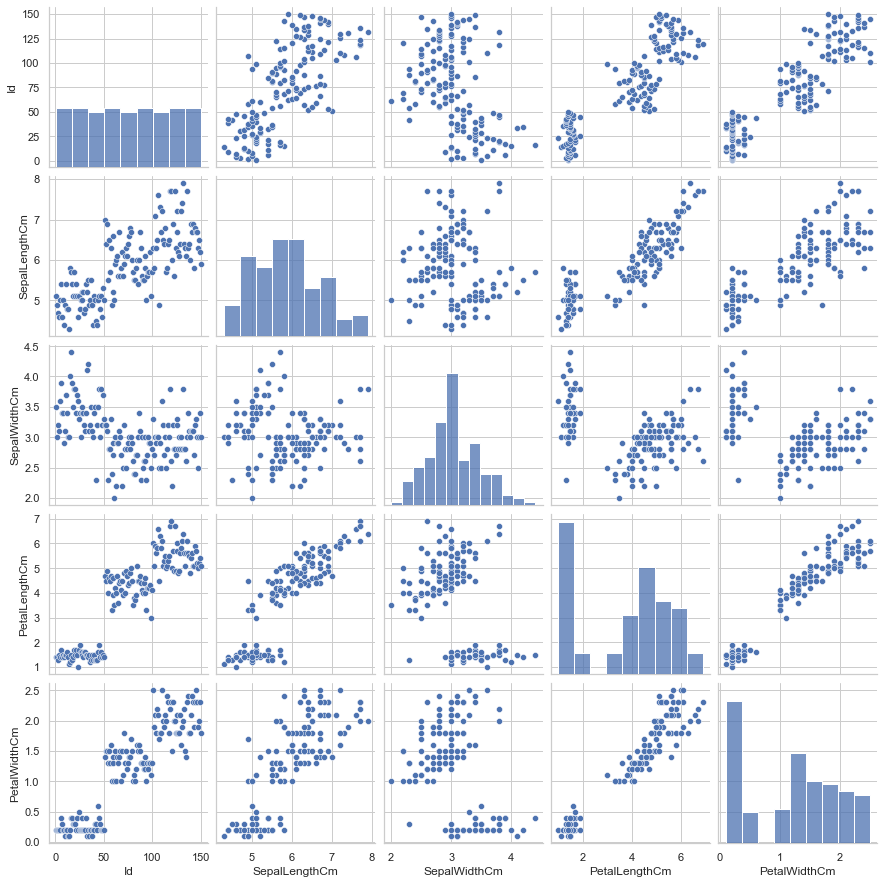

In [19]:
sns.pairplot(iris)

[]

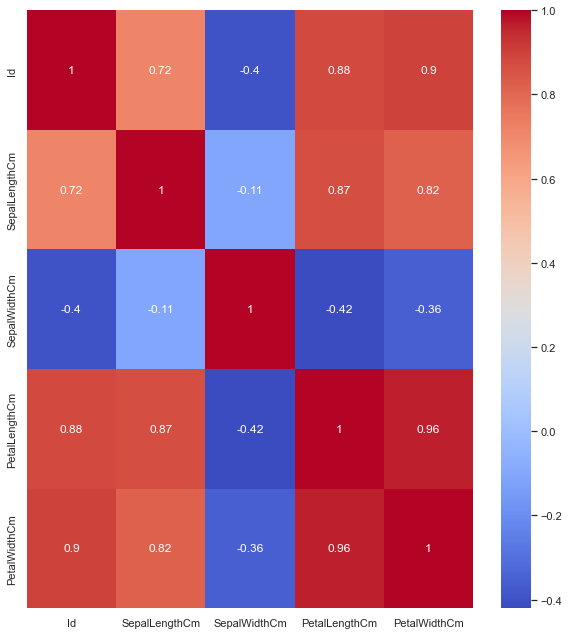

In [20]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True, cmap="coolwarm")
plt.plot()

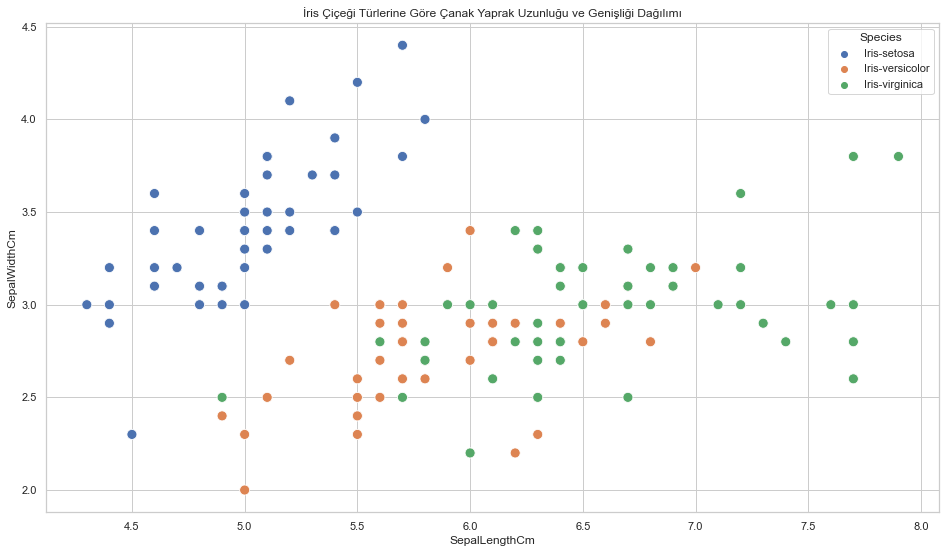

In [24]:
plt.figure(figsize=(16,9))
plt.title('İris Çiçeği Türlerine Göre Çanak Yaprak Uzunluğu ve Genişliği Dağılımı')
sns.scatterplot(iris['SepalLengthCm'], iris['SepalWidthCm'], hue = iris['Species'], s= 100);

In [ ]:

Taç yaprak uzunluk ve genişlik özniteliklerine dayalı olarak benzer şekilde dağılım grafiğini çizdirelim.

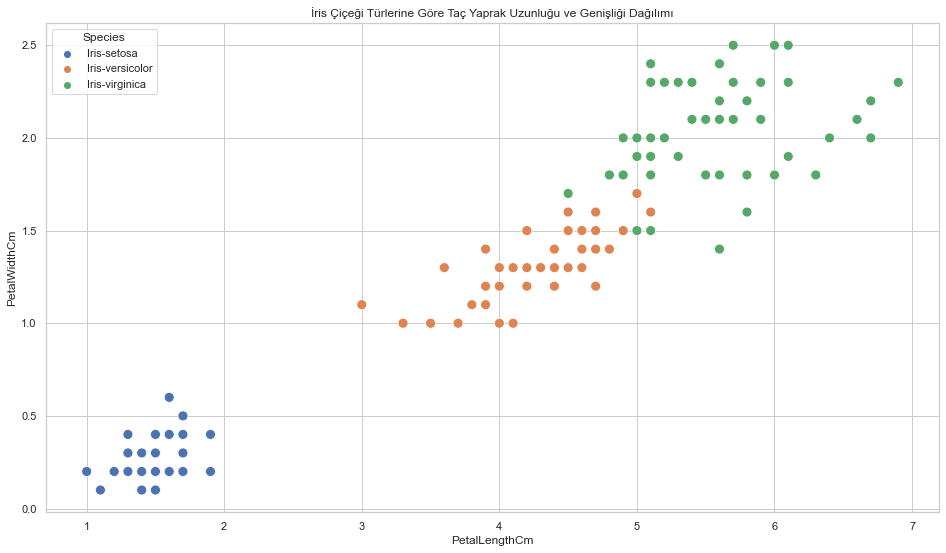

In [26]:
plt.figure(figsize=(16,9))
plt.title('İris Çiçeği Türlerine Göre Taç Yaprak Uzunluğu ve Genişliği Dağılımı')
sns.scatterplot(iris['PetalLengthCm'], iris['PetalWidthCm'], hue = iris['Species'], s= 100);

In [ ]:
pairplot grafiklerini kullanarak tüm sütunların çiçek türüne göre ilişkisini görselleştirelim.

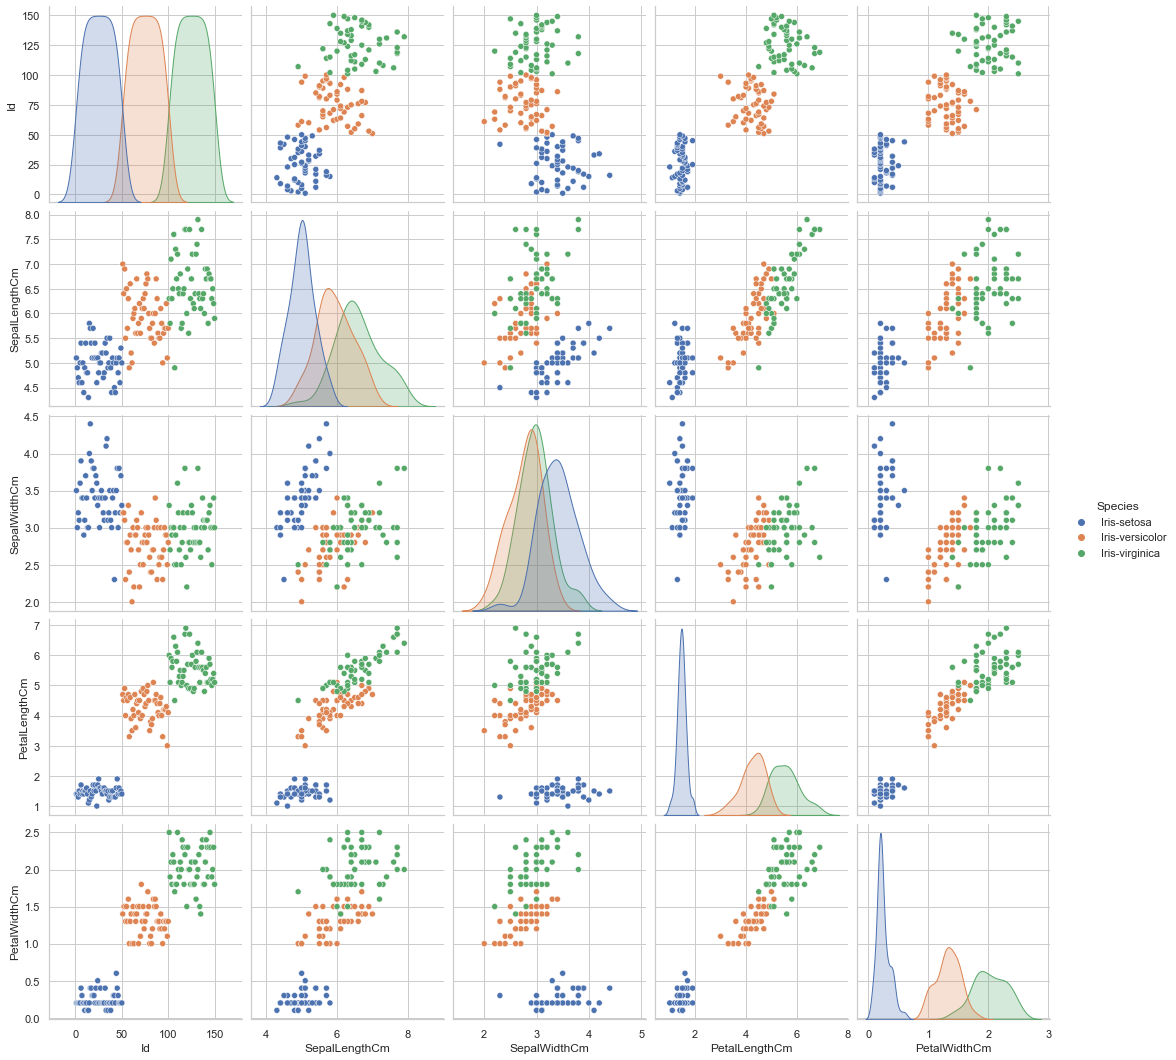

In [28]:
sns.pairplot(iris,hue="Species",height=3);

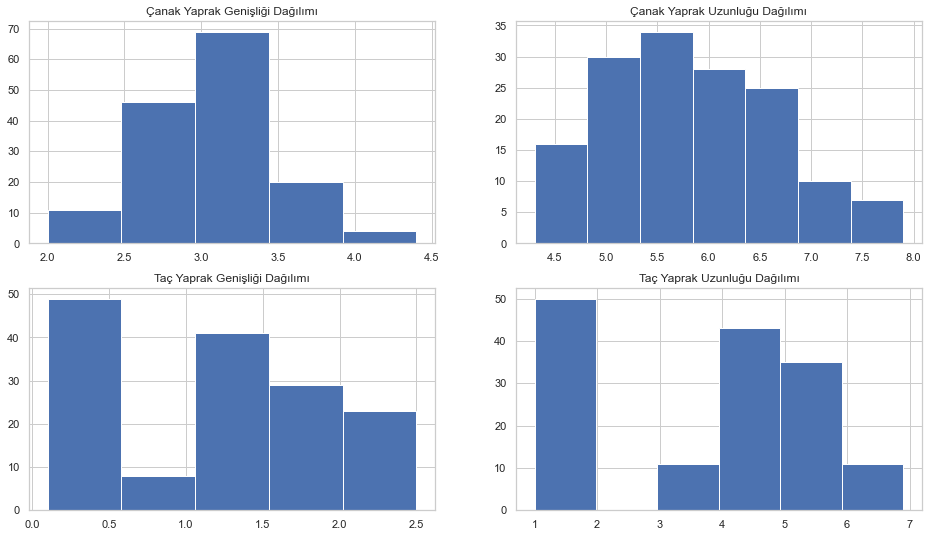

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Çanak Yaprak Genişliği Dağılımı")
axes[0,0].hist(iris['SepalWidthCm'], bins=5);
axes[0,1].set_title("Çanak Yaprak Uzunluğu Dağılımı")
axes[0,1].hist(iris['SepalLengthCm'], bins=7);
axes[1,0].set_title("Taç Yaprak Genişliği Dağılımı")
axes[1,0].hist(iris['PetalWidthCm'], bins=5);
axes[1,1].set_title("Taç Yaprak Uzunluğu Dağılımı")
axes[1,1].hist(iris['PetalLengthCm'], bins=6);

# Sütunların Tek Değişkenli Analizi (Uni-Variate Analysis)

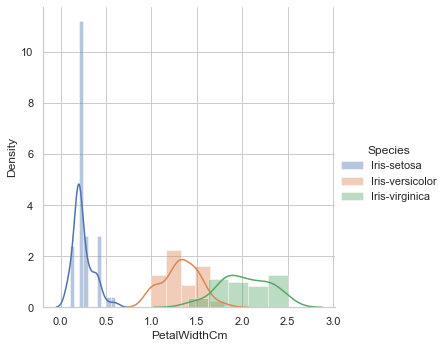

In [36]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

In [ ]:
taç yaprak uzunluğu özniteliği için de yapalım

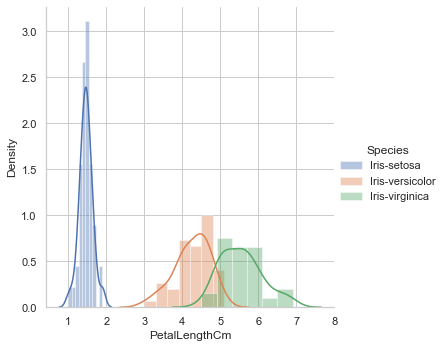

In [38]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

In [ ]:
Çanak yaprak uzunluğu ile devam edelim.

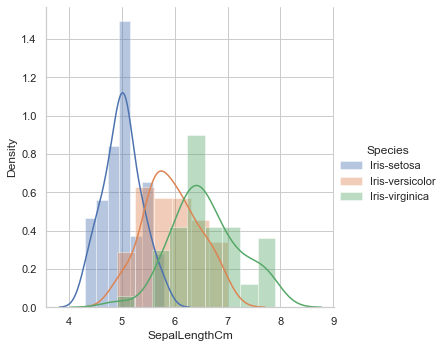

In [40]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

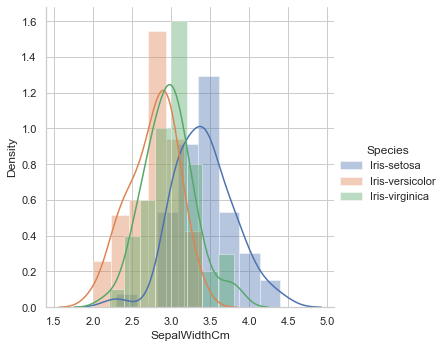

In [42]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

# SONUÇ...

# Veri kümesi dengelidir.

# Taç yaprak genişliği ile taç yaprak uzunluğu arasında güçlü bir korelasyon mevcuttur.

# Setosa türleri, küçük boyutlu olmasından dolayı en kolay ayırt edilebilen türdür.

# Versicolor türünün boyutları daha ortalama değerdedir. 

# Virginica türünün boyutları daha büyüktür.